## Mini Project

In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Setting Working Directory

In [58]:
os.chdir("D:/Mini Project/6. Classification")

### Loading the Dataset


In [59]:
bank = pd.read_csv("PL_XSELL.csv")

In [60]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
CUST_ID                     20000 non-null object
TARGET                      20000 non-null int64
AGE                         20000 non-null int64
GENDER                      20000 non-null object
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null object
AGE_BKT                     20000 non-null object
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null object
ACC_OP_DATE                 20000 non-null object
LEN_OF_RLTN_IN_MNTH         20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
N

### Removig columng not required for making the model

In [61]:
bank_final=bank.drop(columns=['AGE_BKT','ACC_OP_DATE','NO_OF_L_CR_TXNS','NO_OF_L_DR_TXNS','TOT_NO_OF_L_TXNS',
                              'AMT_OTH_BK_ATM_USG_CHGS','AMT_MIN_BAL_NMC_CHGS','NO_OF_IW_CHQ_BNC_TXNS',
                              'NO_OF_OW_CHQ_BNC_TXNS','AVG_AMT_PER_ATM_TXN','AVG_AMT_PER_CSH_WDL_TXN','AVG_AMT_PER_CHQ_TXN',
                              'AVG_AMT_PER_NET_TXN','AVG_AMT_PER_MOB_TXN','random'])

In [62]:
bank_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
CUST_ID                     20000 non-null object
TARGET                      20000 non-null int64
AGE                         20000 non-null int64
GENDER                      20000 non-null object
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null object
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null object
LEN_OF_RLTN_IN_MNTH         20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
NO_OF_MOB_DR_TXNS           20000 non-null int64
NO_OF_CHQ_DR_TXNS           20000 non-null int64
FLG_HAS_CC                  20000 non-null int64
AMT_ATM_DR                  20000 non-null int64
AMT_BR_CSH_WDL_DR           20000 non-null int64
AMT

### Split datasets into train and test datasets

In [63]:
from sklearn.cross_validation import train_test_split

In [64]:
train,test = train_test_split( bank_final, test_size = 0.3)

In [65]:
train.count()

CUST_ID                     14000
TARGET                      14000
AGE                         14000
GENDER                      14000
BALANCE                     14000
OCCUPATION                  14000
SCR                         14000
HOLDING_PERIOD              14000
ACC_TYPE                    14000
LEN_OF_RLTN_IN_MNTH         14000
NO_OF_BR_CSH_WDL_DR_TXNS    14000
NO_OF_ATM_DR_TXNS           14000
NO_OF_NET_DR_TXNS           14000
NO_OF_MOB_DR_TXNS           14000
NO_OF_CHQ_DR_TXNS           14000
FLG_HAS_CC                  14000
AMT_ATM_DR                  14000
AMT_BR_CSH_WDL_DR           14000
AMT_CHQ_DR                  14000
AMT_NET_DR                  14000
AMT_MOB_DR                  14000
AMT_L_DR                    14000
FLG_HAS_ANY_CHGS            14000
FLG_HAS_NOMINEE             14000
FLG_HAS_OLD_LOAN            14000
dtype: int64

In [66]:
test.count()

CUST_ID                     6000
TARGET                      6000
AGE                         6000
GENDER                      6000
BALANCE                     6000
OCCUPATION                  6000
SCR                         6000
HOLDING_PERIOD              6000
ACC_TYPE                    6000
LEN_OF_RLTN_IN_MNTH         6000
NO_OF_BR_CSH_WDL_DR_TXNS    6000
NO_OF_ATM_DR_TXNS           6000
NO_OF_NET_DR_TXNS           6000
NO_OF_MOB_DR_TXNS           6000
NO_OF_CHQ_DR_TXNS           6000
FLG_HAS_CC                  6000
AMT_ATM_DR                  6000
AMT_BR_CSH_WDL_DR           6000
AMT_CHQ_DR                  6000
AMT_NET_DR                  6000
AMT_MOB_DR                  6000
AMT_L_DR                    6000
FLG_HAS_ANY_CHGS            6000
FLG_HAS_NOMINEE             6000
FLG_HAS_OLD_LOAN            6000
dtype: int64

### Splitting into features and response variables

In [67]:
X_train =  train[['AGE', 'GENDER', 'BALANCE','OCCUPATION','SCR', 'HOLDING_PERIOD', 'ACC_TYPE', 'LEN_OF_RLTN_IN_MNTH',
                 'NO_OF_BR_CSH_WDL_DR_TXNS','NO_OF_ATM_DR_TXNS',
                 'NO_OF_NET_DR_TXNS','NO_OF_MOB_DR_TXNS','NO_OF_CHQ_DR_TXNS','FLG_HAS_CC','AMT_ATM_DR','AMT_BR_CSH_WDL_DR',
                 'AMT_CHQ_DR','AMT_NET_DR','AMT_MOB_DR','AMT_L_DR','FLG_HAS_ANY_CHGS','FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN']]

In [68]:
y_train = train["TARGET"]

Categorical Variable to Numerical Variables

In [69]:
X_train = pd.get_dummies(X_train)
X_train.columns

Index(['AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH',
       'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS',
       'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR',
       'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR',
       'AMT_L_DR', 'FLG_HAS_ANY_CHGS', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN',
       'GENDER_F', 'GENDER_M', 'GENDER_O', 'OCCUPATION_PROF', 'OCCUPATION_SAL',
       'OCCUPATION_SELF-EMP', 'OCCUPATION_SENP', 'ACC_TYPE_CA', 'ACC_TYPE_SA'],
      dtype='object')

In [70]:
X_train.head()

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,...,FLG_HAS_OLD_LOAN,GENDER_F,GENDER_M,GENDER_O,OCCUPATION_PROF,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_CA,ACC_TYPE_SA
298,32,2631511.45,173,19,161,1,1,1,0,2,...,1,0,1,0,0,1,0,0,0,1
1071,32,1478188.08,148,7,170,1,1,0,1,6,...,0,0,1,0,0,0,0,1,1,0
6542,36,843739.82,990,26,85,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
16353,31,285015.40,287,15,140,1,1,0,0,4,...,0,1,0,0,0,0,0,1,0,1
1429,32,394828.57,227,16,183,0,0,0,0,4,...,0,1,0,0,0,1,0,0,0,1


In [71]:
X_test=test[['AGE', 'GENDER', 'BALANCE','OCCUPATION','SCR', 'HOLDING_PERIOD', 'ACC_TYPE', 'LEN_OF_RLTN_IN_MNTH',
                 'NO_OF_BR_CSH_WDL_DR_TXNS','NO_OF_ATM_DR_TXNS',
                 'NO_OF_NET_DR_TXNS','NO_OF_MOB_DR_TXNS','NO_OF_CHQ_DR_TXNS','FLG_HAS_CC','AMT_ATM_DR','AMT_BR_CSH_WDL_DR',
                 'AMT_CHQ_DR','AMT_NET_DR','AMT_MOB_DR','AMT_L_DR','FLG_HAS_ANY_CHGS','FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN']]
y_test= test["TARGET"]

In [72]:
X_test= pd.get_dummies(X_test)

In [73]:
print(type(X_train) , type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [74]:
X_train.count()

AGE                         14000
BALANCE                     14000
SCR                         14000
HOLDING_PERIOD              14000
LEN_OF_RLTN_IN_MNTH         14000
NO_OF_BR_CSH_WDL_DR_TXNS    14000
NO_OF_ATM_DR_TXNS           14000
NO_OF_NET_DR_TXNS           14000
NO_OF_MOB_DR_TXNS           14000
NO_OF_CHQ_DR_TXNS           14000
FLG_HAS_CC                  14000
AMT_ATM_DR                  14000
AMT_BR_CSH_WDL_DR           14000
AMT_CHQ_DR                  14000
AMT_NET_DR                  14000
AMT_MOB_DR                  14000
AMT_L_DR                    14000
FLG_HAS_ANY_CHGS            14000
FLG_HAS_NOMINEE             14000
FLG_HAS_OLD_LOAN            14000
GENDER_F                    14000
GENDER_M                    14000
GENDER_O                    14000
OCCUPATION_PROF             14000
OCCUPATION_SAL              14000
OCCUPATION_SELF-EMP         14000
OCCUPATION_SENP             14000
ACC_TYPE_CA                 14000
ACC_TYPE_SA                 14000
dtype: int64

In [75]:
X_test.count()

AGE                         6000
BALANCE                     6000
SCR                         6000
HOLDING_PERIOD              6000
LEN_OF_RLTN_IN_MNTH         6000
NO_OF_BR_CSH_WDL_DR_TXNS    6000
NO_OF_ATM_DR_TXNS           6000
NO_OF_NET_DR_TXNS           6000
NO_OF_MOB_DR_TXNS           6000
NO_OF_CHQ_DR_TXNS           6000
FLG_HAS_CC                  6000
AMT_ATM_DR                  6000
AMT_BR_CSH_WDL_DR           6000
AMT_CHQ_DR                  6000
AMT_NET_DR                  6000
AMT_MOB_DR                  6000
AMT_L_DR                    6000
FLG_HAS_ANY_CHGS            6000
FLG_HAS_NOMINEE             6000
FLG_HAS_OLD_LOAN            6000
GENDER_F                    6000
GENDER_M                    6000
GENDER_O                    6000
OCCUPATION_PROF             6000
OCCUPATION_SAL              6000
OCCUPATION_SELF-EMP         6000
OCCUPATION_SENP             6000
ACC_TYPE_CA                 6000
ACC_TYPE_SA                 6000
dtype: int64

In [76]:
y_train.value_counts()

0    12235
1     1765
Name: TARGET, dtype: int64

In [77]:
Response_percentage = 1801/14000 * 100
Response_percentage


12.864285714285714

Only 12.86 % are 1’s here. So the data is unbalanced, need to oversample the data to make it balanced.

### Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

Setting the parameter

In [79]:
clf = DecisionTreeClassifier(criterion = "gini" , 
                             min_samples_split = 100,
                             min_samples_leaf = 10,
                             max_depth = 50)

Calling the fit function to build the tree

In [80]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
import pydotplus
import graphviz
import io
from sklearn.tree import export_graphviz
from scipy import misc
from matplotlib import pyplot as plt
f = io.StringIO()

In [87]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

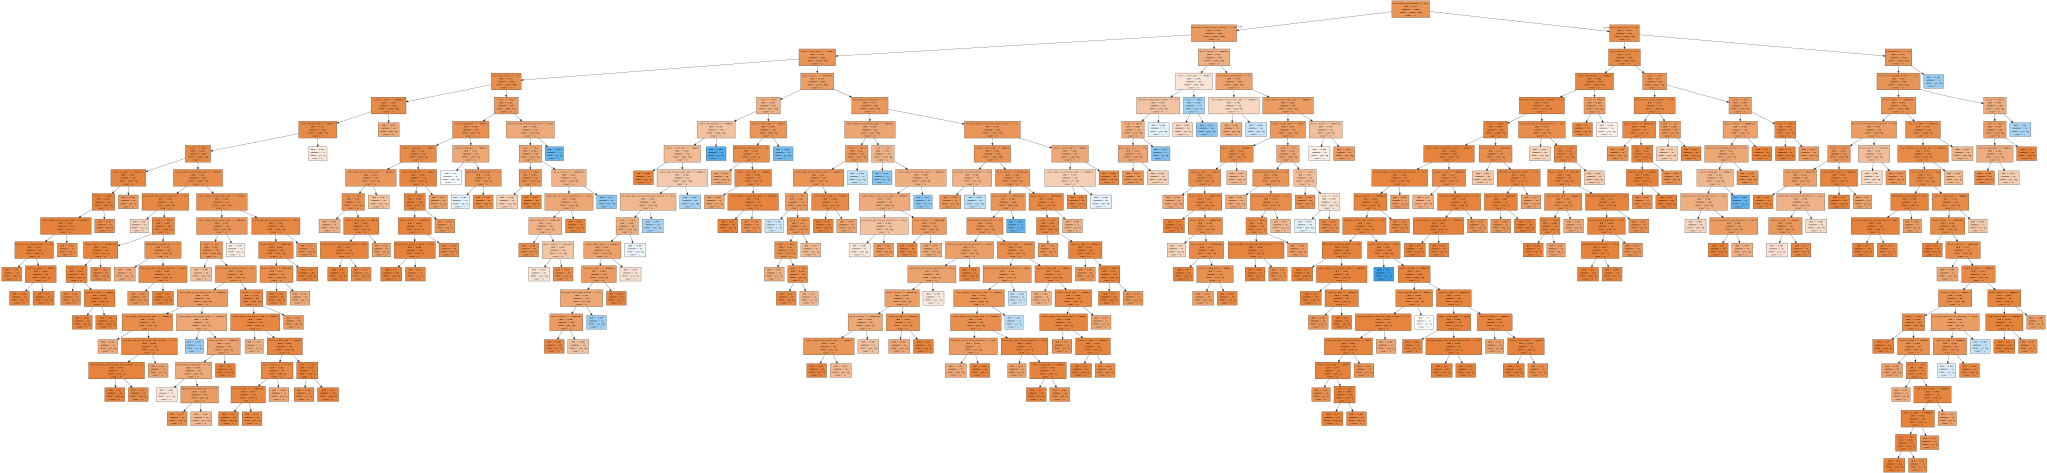

In [89]:
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

Checking the nodes

In [90]:
Nodes = pd.DataFrame(clf.tree_.__getstate__()["nodes"])
Nodes.head()

,left_child,right_child,feature,threshold,impurity,n_node_samples,weighted_n_node_samples
0,1,286,3,16.5,0.220355,14000,14000.0
1,2,237,25,0.5,0.268926,7783,7783.0
2,3,120,11,11450.0,0.236579,6405,6405.0
3,4,79,10,0.5,0.177032,3566,3566.0
4,5,78,16,1904970.0,0.138497,2525,2525.0


### Finding the variable with more importance

In [91]:
feature_importance = pd.DataFrame([X_train.columns,
                               clf.tree_.compute_feature_importances()])
feature_importance.T 

,0,1
0,AGE,0.094356
1,BALANCE,0.152174
2,SCR,0.0820279
3,HOLDING_PERIOD,0.0865873
4,LEN_OF_RLTN_IN_MNTH,0.0776843
5,NO_OF_BR_CSH_WDL_DR_TXNS,0.0163379
6,NO_OF_ATM_DR_TXNS,0.000483093
7,NO_OF_NET_DR_TXNS,0.00680553
8,NO_OF_MOB_DR_TXNS,0.0055006
9,NO_OF_CHQ_DR_TXNS,0.0198552


Here , SCR = 0.1302, which is the most important variable in the dataset

### Checking how good is the model,

Predicting Y values with training data set

In [92]:
pred_y_train = clf.predict(X_train )
pred_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Let us see the classification accuracy of our model

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [94]:
score = accuracy_score(y_train, pred_y_train)
score

0.8892142857142857

Here the got accuracy is 88.71%, which is same as that without model. So here classification accuracy is not a good measure.

In [95]:
y_train_prob = clf.predict_proba(X_train)
y_train_prob

array([[1.        , 0.        ],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       ...,
       [0.98979592, 0.01020408],
       [1.        , 0.        ],
       [1.        , 0.        ]])

### Checking accuracy with test data set

In [96]:
pred_y_test = clf.predict(X_test)
pred_y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
score_h = accuracy_score(y_test, pred_y_test)
score_h

0.8681666666666666

Here accuracy is 87.26%, the model accuracy is not much deviating from that of training data. So the model is not overfitting


### Now doing cross validation to overcome over fitting

In [106]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, X_train , y_train, cv = 10, scoring='roc_auc')

scores.mean()


0.7794181423030644

In [107]:
scores.std()

0.0197013896446261

So by cross validation we get the correct AUC of the model, that is 0.7826 is the correct AUC with standard deviation of 0.020. That we have to use this AUC as final statistics.

In [108]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

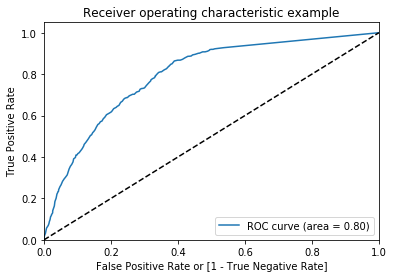

In [109]:
y_test_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = draw_roc(y_test, y_test_prob[:,1])

In [110]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.7956557494652765

In [111]:
y_freq = np.bincount(y_train)
y_val = np.nonzero(y_freq)[0]
np.vstack((y_val,y_freq[y_val])).T


array([[    0, 12235],
       [    1,  1765]], dtype=int64)

Response rate

In [113]:
1765/14000

0.12607142857142858

### Now we need to try to improve AUC by Grid search Cross validation

In [114]:
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [116]:
param_dist = {"criterion": ["gini","entropy"],
              "max_depth": np.arange(3,50),
              }

tree = DecisionTreeClassifier(min_samples_split = 100,
                             min_samples_leaf = 10)

tree_cv  = GridSearchCV(tree, param_dist, cv = 10, 
                        scoring = 'roc_auc')

tree_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

Building the model using best combination of parameters

In [118]:
print("Tuned Decision Tree parameter : {}".format(tree_cv.best_params_))

Tuned Decision Tree parameter : {'criterion': 'entropy', 'max_depth': 15}


In [119]:
classifier = tree_cv.best_estimator_

classifier.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### predicting probabilities

In [120]:
y_train_prob = classifier.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc_d = auc(fpr, tpr)
auc_d

0.9068545053143642

In [121]:
y_test_prob = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc_h = auc(fpr, tpr)
auc_h

0.7965074333758666

In [122]:
(auc_d-auc_h)/auc_d

0.12168112006042843

Here getting a deviation of 10.8%.  That is also more than 5%.

#### Now checking rank ordering

In [123]:
Prediction = classifier.predict_proba(X_train)
train["prob_score"] = Prediction[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [124]:
train.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,LEN_OF_RLTN_IN_MNTH,...,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,prob_score
298,C5781,0,32,M,2631511.45,SAL,173,19,SA,161,...,3700,304160,76830,161473.0,0,546163.0,0,1,1,0.205128
1071,C19454,1,32,M,1478188.08,SENP,148,7,CA,170,...,15700,134940,84737,0.0,20164,255541.0,0,0,0,0.230769
6542,C1641,0,36,M,843739.82,PROF,990,26,CA,85,...,0,0,0,0.0,197855,197855.0,0,1,0,0.000000
16353,C2726,0,31,F,285015.40,SENP,287,15,SA,140,...,17700,752220,47130,0.0,0,817050.0,0,1,0,0.000000
1429,C1317,0,32,F,394828.57,SAL,227,16,SA,183,...,0,0,28460,0.0,0,28460.0,0,1,0,0.000000


scoring step



decile code

In [125]:
def deciles(x):
    decile = pd.Series(index=[0,1,2,3,4,5,6,7,8,9])
    for i in np.arange(0.1,1.1,0.1):
        decile[int(i*10)]=x.quantile(i)
    def z(x):
        if x<decile[1]: return(1)
        elif x<decile[2]: return(2)
        elif x<decile[3]: return(3)
        elif x<decile[4]: return(4)
        elif x<decile[5]: return(5)
        elif x<decile[6]: return(6)
        elif x<decile[7]: return(7)
        elif x<decile[8]: return(8)
        elif x<decile[9]: return(9)
        elif x<=decile[10]: return(10)
        else:return(np.NaN)
    s=x.map(z)
    return(s)

In [126]:
def Rank_Ordering(X,y,Target):
    X['decile']=deciles(X[y])
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_resp","max_resp","avg_resp",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank = Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"] = Rank["cnt_resp"]*100/Rank["cnt"]
    Rank["cum_resp"] = np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"] = np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"] = Rank["cum_resp"]/np.sum(Rank["cnt_resp"])
    Rank["cum_non_resp_pct"]=Rank["cum_non_resp"]/np.sum(Rank["cnt_non_resp"])
    Rank["KS"] = Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"]
    Rank
    return(Rank)

In [127]:
Rank = Rank_Ordering(train,"prob_score","TARGET")
Rank

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
5,10,0.409091,1.000000,0.591323,1429.0,845.0,584.0,59.132260,845.0,584.0,0.478754,0.047732,0.431022
4,9,0.228261,0.403509,0.311142,1427.0,444.0,983.0,31.114226,1289.0,1567.0,0.730312,0.128075,0.602236
3,8,0.119048,0.226190,0.176514,1354.0,239.0,1115.0,17.651403,1528.0,2682.0,0.865722,0.219207,0.646515
2,7,0.079545,0.111111,0.096061,1447.0,139.0,1308.0,9.606082,1667.0,3990.0,0.944476,0.326114,0.618362
1,6,0.042553,0.078947,0.056657,1412.0,80.0,1332.0,5.665722,1747.0,5322.0,0.989802,0.434982,0.554820
0,5,0.000000,0.037037,0.002597,6931.0,18.0,6913.0,0.259703,1765.0,12235.0,1.000000,1.000000,0.000000


We are getting 6 deciles, best Ks value is 64.26%.

Let us see the Rank Ordering on test Dataset

In [128]:
Prediction_h = classifier.predict_proba(X_test)
test["prob_score"] = Prediction_h[:,1]

Rank_h = Rank_Ordering(test,"prob_score","TARGET")
Rank_h


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
5,10,0.409091,1.000000,0.568795,634.0,250.0,384.0,39.432177,250.0,384.0,0.334672,0.073101,0.261571
4,9,0.230769,0.403509,0.320412,597.0,153.0,444.0,25.628141,403.0,828.0,0.539491,0.157624,0.381867
3,8,0.125000,0.228261,0.188439,576.0,130.0,446.0,22.569444,533.0,1274.0,0.713521,0.242528,0.470993
2,7,0.085106,0.120482,0.100622,625.0,63.0,562.0,10.080000,596.0,1836.0,0.797858,0.349515,0.448344
1,6,0.046512,0.083333,0.063065,574.0,60.0,514.0,10.452962,656.0,2350.0,0.878179,0.447363,0.430816
0,5,0.000000,0.044118,0.003891,2994.0,91.0,2903.0,3.039412,747.0,5253.0,1.000000,1.000000,0.000000


Here the best KS is 48.23%, so this is good model.

In [129]:
Deviation = (0.6426 - 0.4899)/0.6426
Deviation


0.23762838468720815

It is very high, must be within 10%

In [337]:
(55.13-37.20)/55.13

0.32523127153999637

In [338]:
y_freq = np.bincount(y_test)
y_val = np.nonzero(y_freq)[0]
np.vstack((y_val,y_freq[y_val])).T

array([[   0, 5291],
       [   1,  709]], dtype=int64)

In [339]:
Responserate=709 / 6000
Responserate

0.11816666666666667

In [340]:
## LIFT For training data
0.6426/0.1287


4.9930069930069925

In [343]:
## LIFT For test data
0.4899/0.1181

4.14817950889077

In [345]:
##difference
(4.99-4.14)/4.99

0.17034068136272554

This is also very high for a model.

so basically ,targetting top 3 deciles will help the bank to get people who need the loans